In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [77]:
train_dataset = pd.read_csv('drive/MyDrive/Colab Datasets/House Price Prediction/train.csv')

In [120]:
test_dataset = pd.read_csv('drive/MyDrive/Colab Datasets/House Price Prediction/test.csv')

In [80]:
train_dataset.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [81]:
train_dataset.shape

(29451, 12)

In [82]:
train_dataset.info

<bound method DataFrame.info of       POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE               

In [83]:
train_dataset.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [121]:
train_dataset.replace({'POSTED_BY':{'Owner':0 ,'Dealer': 1,'Builder': 2}},inplace=True)
test_dataset.replace({'POSTED_BY':{'Owner':0 ,'Dealer': 1,'Builder': 2}},inplace=True)

In [148]:
X = train_dataset.drop(['BHK_OR_RK','LONGITUDE','LATITUDE','TARGET(PRICE_IN_LACS)','ADDRESS'],axis=1)

In [149]:
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE
0,0,0,0,2,1300.236407,1,1
1,1,0,0,2,1275.000000,1,1
2,0,0,0,2,933.159722,1,1
3,0,0,1,2,929.921143,1,1
4,1,1,0,2,999.009247,0,1
...,...,...,...,...,...,...,...
29446,0,0,0,3,2500.000000,1,1
29447,0,0,0,2,769.230769,1,1
29448,1,0,0,2,1022.641509,1,1
29449,0,0,0,2,927.079009,1,1


In [150]:
correlation=test_dataset.corr()

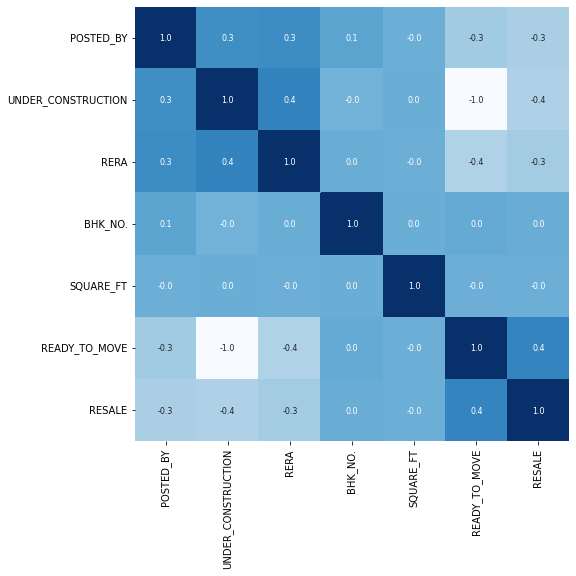

In [151]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=False, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [152]:
Y = train_dataset['TARGET(PRICE_IN_LACS)']

In [153]:
Y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [171]:
test_dataset.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE
0,0,0,0,1,545.171340,1,1
1,1,1,1,2,800.000000,0,0
2,1,0,0,2,1257.096513,1,1
3,1,0,0,3,1400.329489,1,1
4,0,0,0,1,430.477830,1,1


In [157]:
#test_dataset=test_dataset.drop(['BHK_OR_RK','LONGITUDE','LATITUDE','ADDRESS'], axis = 1)


In [158]:
X_train = X
Y_train = Y


In [159]:
X_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE
0,0,0,0,2,1300.236407,1,1
1,1,0,0,2,1275.000000,1,1
2,0,0,0,2,933.159722,1,1
3,0,0,1,2,929.921143,1,1
4,1,1,0,2,999.009247,0,1
...,...,...,...,...,...,...,...
29446,0,0,0,3,2500.000000,1,1
29447,0,0,0,2,769.230769,1,1
29448,1,0,0,2,1022.641509,1,1
29449,0,0,0,2,927.079009,1,1


In [160]:
Y_train

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [161]:
X_test=test_dataset
test_dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE
0,0,0,0,1,545.171340,1,1
1,1,1,1,2,800.000000,0,0
2,1,0,0,2,1257.096513,1,1
3,1,0,0,3,1400.329489,1,1
4,0,0,0,1,430.477830,1,1
...,...,...,...,...,...,...,...
68715,1,0,1,2,856.555505,1,1
68716,1,0,1,3,2304.147465,1,1
68717,1,1,1,1,33362.792750,0,0
68718,1,0,0,2,1173.708920,1,1


In [163]:
#Y_test = test_dataset['TARGET(PRICE_IN_LACS)']

In [172]:
lin_reg_model = LinearRegression()

In [173]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [174]:
prediction = lin_reg_model.predict(X_train)

In [175]:
error_score = metrics.r2_score(Y_train,prediction)

In [176]:
error_score

0.21903873081608782

In [177]:
prediction

array([ 53.16876411,  78.85094587,  53.11771045, ...,  78.81584741,
        53.11686473, 100.23438317])

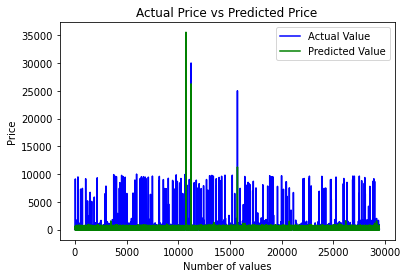

In [178]:
plt.plot(Y_train, color='blue', label = 'Actual Value')
plt.plot(prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Price')
plt.legend()
plt.show()